第十二组
- 夏安琪 2020213452
- 张佳怡 2020213545 
- 陈怡聪 2020213429
- 何晨媛 2020213436
- 刘吴迪 2020213509 

分工
- 爬数据：夏安琪、张佳怡、陈怡聪、何晨媛、刘吴迪
- 描述性统计与可视化：张佳怡、何晨媛、陈怡聪
- 文本分析：张佳怡、夏安琪、刘吴迪
- ppt制作&展示：夏安琪

# 1 爬数据

## 1.1 原网页中的数据

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

In [ ]:
# 提取数据、解析数据
web='https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html'
req = Request(web, headers={'User-Agent': 'Mozilla/5.0'})
downloaded_web = urlopen(req).read()
soup = BeautifulSoup(downloaded_web)

In [ ]:
# execution
execution=[]
for i in range(1,571):
    execution_i=soup.find_all('tr')[i].find_all('td')[0].text
    execution.append(execution_i)

In [ ]:
# offender_information_url
offender_information_url=[]
for i in range(1,571):
    offender_information_url_i=soup.find_all('tr')[i].find_all('td')[1].find('a')['href']
    offender_information_url.append('https://www.tdcj.texas.gov/death_row/'+offender_information_url_i)

In [ ]:
# last_statement_url
last_statement_url=[]
for i in range(1,571):
    last_statement_url_i=soup.find_all('tr')[i].find_all('td')[2].find('a')['href']
    last_statement_url.append('https://www.tdcj.texas.gov/death_row/'+last_statement_url_i)

In [ ]:
# first_name
first_name=[]
for i in range(1,571):
    first_name_i=soup.find_all('tr')[i].find_all('td')[4].text
    first_name.append(first_name_i)

In [ ]:
# TDCJ_Number
TDCJ_Number=[]
for i in range(1,571):
    TDCJ_Number_i=soup.find_all('tr')[i].find_all('td')[5].text
    TDCJ_Number.append(TDCJ_Number_i)

In [ ]:
# age
age=[]
for i in range(1,571):
    age_i=soup.find_all('tr')[i].find_all('td')[6].text
    age.append(age_i)

In [ ]:
# date
date=[]
for i in range(1,571):
    date_i=soup.find_all('tr')[i].find_all('td')[7].text
    date.append(date_i)

In [ ]:
# race
race=[]
for i in range(1,571):
    race_i=soup.find_all('tr')[i].find_all('td')[8].text
    race.append(race_i)

In [ ]:
# county## 1.2 offender_information_url中的数据
county=[]
for i in range(1,571):
    county_i=soup.find_all('tr')[i].find_all('td')[9].text
    county.append(county_i)

## 1.2 offender_information_url中的数据

In [ ]:
# prior occupation
prior_occupation=[]
import time
for url in offender_information_url:
    time.sleep(1)
    info_req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    info_downloaded_url = urlopen(info_req).read()
    info_soup = BeautifulSoup(info_downloaded_url)
    prior_occupation_i = info_soup.find('p').text
    prior_occupation.append(prior_occupation_i)
print(prior_occupation)

In [ ]:
# prior prison record
prior_prison_record=[]
import time
for url in offender_information_url:
    time.sleep(1)
    info_req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    info_downloaded_url = urlopen(info_req).read()
    info_soup = BeautifulSoup(info_downloaded_url)
    prior_prison_record_i = info_soup.find_all('p')[1].text
    prior_prison_record.append(prior_prison_record_i)
print(prior_prison_record)

In [ ]:
# education level
education_level=[]
import time
for url in offender_information_url:
    time.sleep(1)
    info_req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    info_downloaded_url = urlopen(info_req).read()
    info_soup = BeautifulSoup(info_downloaded_url)
    education_level_i = info_soup.find_all('tr')[6].find_all('td')[1].text
    education_level.append(education_level_i)
print(education_level)## 1.3 last_statement_url中的数据

## 1.3 last_statement_url中的数据

In [ ]:
last_statement = []
count = 0
for url in last_statement_url:
    last_text = requests.get(url=url,headers=headers).text
    last_soup = BeautifulSoup(last_text,'lxml')
    statements = last_soup.find_all('p')
    statement = ''
    for s in statements:
        statement = statement+s.text
        #statement
    last_statement.append(statement.split('Last Statement:')[-1].replace('\xa0','').replace('\r\n','').strip('\n'))
    print(count)
    count = count+1
    if count == 570:
        break

## 1.4 合并数据

In [ ]:
data={'execution':execution, 'offender_information_url':offender_information_url, 'last_statement_url':last_statement_url, 'last_name':last_name, 'first_name': first_name,'TDCJ_Number':TDCJ_Number, 'age':age, 'date':date, 'race':race, 'county':county,'prior_occupation':prior_occupation,'prior_prison_record':prior_prison_record,'education_level':education_level,'last_statement':last_statement}
df=pd.DataFrame(data)
df.to_excel('Death Row Information.xlsx')

# 2 描述性统计&可视化

- 准备工作1:数据读入&数据概览

In [1]:
import pandas as pd
import plotly.express as px
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [2]:
data=pd.read_excel('final data set.xlsx')
data.head()

execution                           offender_information_url  \
0        570  https://www.tdcj.texas.gov/death_row/dr_info/w...   
1        569  https://www.tdcj.texas.gov/death_row/dr_info/o...   
2        568  https://www.tdcj.texas.gov/death_row/dr_info/g...   
3        567  https://www.tdcj.texas.gov/death_row/dr_info/r...   
4        566  https://www.tdcj.texas.gov/death_row/dr_info/h...   

                                  last_statement_url last_name first_name  \
0  https://www.tdcj.texas.gov/death_row/dr_info/w...   Wardlow      Billy   
1  https://www.tdcj.texas.gov/death_row/dr_info/o...     Ochoa       Abel   
2  https://www.tdcj.texas.gov/death_row/dr_info/g...   Gardner       John   
3  https://www.tdcj.texas.gov/death_row/dr_info/r...   Runnels     Travis   
4  https://www.tdcj.texas.gov/death_row/dr_info/h...      Hall     Justen   

   TDCJ_Number  age        date      race   county prior occupation  \
0       999137   45    7/8/2020     White    Titus          laborer   
1       999450   47    2/6/2020  Hispanic   Dallas            multi   
2       999516   64   1/15/2020     White   Collin          painter   
3       999505   46  12/11/2019     Black   Potter          laborer   
4       999497   38   11/6/2019     White  El Paso          laborer   

   prior prison record eudcation level  last statement 0/1  length  \
0                    0              11                 0.0       0   
1                    0              12                 1.0      56   
2                    1              12                 1.0     113   
3                    1              11                 0.0       0   
4                    1               9                 1.0      53   

                                      last statement  
0                                                NaN  
1  Yes sir. I  would like to thank God, my dad, m...  
2  Thank you thank you  where’s the family, ok I ...  
3                                                NaN  
4  Yeah, I want to  address the Roundtree family ...

加有趣的遗言

- 准备工作2:封装绘图函数

In [3]:
# figure_age_function
def age(data):
    fig_age = px.violin(data,y='age')
    return fig_age.show()
def age_group(x):
    group1=0
    group2=0
    group3=0
    group4=0
    group5=0
    for i in x:
        if 20<=i<=30:
            group1+=1
        elif i<=40:
            group2+=1
        elif i<=50:
            group3+=1
        elif i<=60:
            group4+=1
        else:
            group5+=1
    x_label = ['21-30','31-40','41-50','51-60','61-70']
    y_label = [group1,group2,group3,group4,group5]
    fig_age_group = px.histogram(x=x_label, y=y_label,labels={'x':'age','y':'age'},title='The count of age')
    return fig_age_group.show()

# figure_race_function
def race(x):
    race = x.value_counts()
    fig_race = px.pie(values=race.values, names=race.index, title='The distribution of Race')
    return fig_race.show()

# figure_county_function
def county_dis(data,texas):
    counties = dict()
    for county in texas["features"]:
        counties[county["properties"]["NAME"]] = county["id"]
    fig_county = px.choropleth(data, geojson=texas,locations=counties,color = data['crime_number'],
                               color_continuous_scale='blues',hover_data=['county', 'crime_number'],
                               range_color=(0,max(data['crime_number'])),scope="usa")
    return fig_county.show()

# figure_occupation_function
def occu_wordcloud(f):
    wordcloud = WordCloud(background_color="white", width=1500,height=960,margin=10).generate(f)
    plt.imshow(wordcloud)
    plt.axis("off")
    wordcloud.to_file('occupation.png')
    return plt.show()

# figure_record_function
def record(x,reindex=True):#data['record']
    record = x.value_counts()
    index = ['have_prior_record','no_prior_record','record_not_avaliable']
    if reindex:
        record.index = index
    fig_record = go.Figure(data=[go.Pie(labels=record.index, values=record.values, hole=.5,title='Prior prison record')])
    return fig_record.show()

# figure_education_function
def edu(x):
    def drop(y):
        if y == 'unknown':
            y = np.nan
        return y
    edu = x.apply(func=drop)
    edu_after_drop = edu.dropna()
    edu_after_drop = edu_after_drop.value_counts()
    edu_after_drop = edu_after_drop.sort_index()
    edu_after_drop
    fig_edu = go.Figure(data=[go.Bar(x=edu_after_drop.index, y=edu_after_drop.values)])
    return fig_edu.show()

## 2.1 Age年龄

In [4]:
age(data)

- 结论：死刑犯年龄最大的为70岁，最小的为24岁，均值和中位数接近40岁。

In [5]:
age_group(data['age'])

## 2.2 Race种族

In [6]:
race(data['race'])

- 结论：死刑犯中白人最多（44.6%），其次为非裔美国人（36%）和拉美裔（19.1%）。
- 结合2003年的得克萨斯洲的人口普查
![人口.jpeg](attachment:人口.jpeg)

## 2.3 County郡县

In [8]:
databb = pd.read_excel('databb.xlsx')
texas = json.load(open("texas.json"))
county_dis(databb,texas)

- 结论：死刑犯集中于Harris、Dallas、Bexar等人口大县。

## 2.4 Occupation职业

In [10]:
data['prior occupation'].nunique()

100

- 结论：570位死刑犯有100种不同的职业。

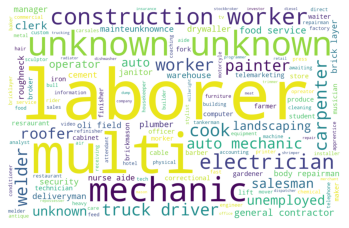

In [11]:
data['prior occupation'].value_counts().head(10)
f = open('occupation.txt','r',encoding='utf-8').read()
occu_wordcloud(f)

- 结论：职业多集中于建筑工人、修理工、电工等。

## 2.5 Prior Prison Record犯罪前科记录

In [9]:
record(data['prior prison record'])

- 结论：超过半数的死刑犯有犯罪前科记录。

## 2.6 Education Level受教育程度

In [10]:
edu(data['eudcation level'])

- 结论：受教育程度基本符合正态分布，受过8-12年教育的死刑犯较多。

# 3 文本分析

## 3.1 from excel to txt

In [52]:
import pandas as pd
import os
import xlrd

In [55]:
data_1 = pd.read_excel('last statement.xlsx')

In [58]:
data = xlrd.open_workbook('last statement.xlsx')
table = data.sheet_by_name('Sheet1') 
nrows = table.nrows
for i in range(0, nrows):
    file = open(str(i) + '.txt', 'wb+')
    file.write(str(table.cell(i, 0).value).encode(encoding='utf-8'))    
    file.close()

## 3.2 Last Statement长度

In [64]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
from pathlib import Path
import re

In [65]:
cwd = Path.cwd()

In [66]:
files = [x for x in os.listdir(cwd) if x.endswith('.txt')]
files_df = pd.DataFrame(files, columns = ['filename'])

In [12]:
data_c = pd.read_excel('final data set.xlsx')['length']
data_c = data_c.sort_values(ascending= False)
data_c.describe()

count     570.000000
mean       84.626316
std       112.666946
min         0.000000
25%         9.000000
50%        53.000000
75%       117.000000
max      1268.000000
Name: length, dtype: float64

结论：在所有死囚中,最多的说了1268个单词，平均每人说84.63个单词。

In [5]:
data_d = pd.read_excel('final data set.xlsx')
data_d = data_d.loc[0:569,['race','eudcation level','length']]
data_d.to_excel('statement_analysis.xlsx')

In [11]:
data_e = pd.read_excel('statement_analysis.xlsx',sheet_name = 'Sheet4')

In [12]:
fig = px.scatter(data_e, x='eudcation level', y='length', size='crime_number', color='eudcation level',color_continuous_scale=px.colors.diverging.Portland,title='Relationship between Education Level and Length of Statement',size_max = 45)
fig.show()

注：横坐标为受教育程度（-1表示受教育程度未知），纵坐标为平均遗言长度，圆点大小代表了该教育程度的人数，人数越多，圆点越大。
- 遗言长度与受教育程度有一定关系。
- 8-12年：遗言长度50-100词。
- <4年，>14年：遗言长度200+词。

In [13]:
data_f = pd.read_excel('statement_analysis.xlsx',sheet_name = 'Sheet2')

In [14]:
fig = px.scatter(data_f, x='crime_number', y="length",color='race',size='crime_number', title='Relationship between Race and Length of Statement',color_continuous_scale=px.colors.diverging.Tealrose,size_max = 50)
fig.show()

- 结论：遗言长度与种族基本无关，各种族的遗言长度均在85词左右。

## 3.3 Last Statement词频

In [68]:
mydict = {}
for file in files:
    with open(file, 'r') as f:
        temp_text = f.read()
        temp_text = temp_text.replace(',', ' ')
        temp_text = temp_text.replace('.', ' ')
        temp_text = temp_text.replace('?', ' ')
        temp_text = temp_text.replace('!', ' ')
        temp_text = temp_text.replace(';', ' ')
        words = temp_text.split()

        for i in words:
            if i in mydict:
                mydict[i]+=1
            else :
                mydict[i]=1

In [69]:
import xlwt

pf = pd.DataFrame(list(mydict))
file_path = pd.ExcelWriter('词频.xlsx')
pf.to_excel(file_path,encoding = 'utf-8',index = False)
file_path.save()

In [70]:
data_fq = pd.DataFrame([mydict])
data_fq.to_excel('词频.xlsx')

In [71]:
import os, os.path
data_len = []
bookdir = r'/Users/yi/Desktop/PyCharm/txt'    # 指定目录  

# 定义统计函数

for file in files:
    with open(file,'r') as myfile:
        content = myfile.read()
            # read() 方法用于从文件读取指定的字节数，如果未给定或为负则读取所有。

        L = content.split()
        N = len(L)
        data_len.append(N)

In [72]:
data_len = pd.DataFrame(data_len)
data_len.to_excel('length.xlsx')

In [73]:
word_frequency_0=pd.read_excel('词频.xlsx')
word_frequency=word_frequency_0.T
word_frequency.head()
word_frequency.to_excel('word_frequency.xlsx')

In [86]:
word_frequency=pd.read_excel('word_frequency.xlsx')
word_frequency=word_frequency.rename(columns={'Unnamed: 0':'word',0:'frequency'})
word_frequency.sort_values(by='frequency',ascending=False,inplace=True)
word_frequency.head(20)

word  frequency
1        I       6976
4       to       3352
15     you       3290
7      and       2828
37     the       2642
17      my       1824
50     for       1726
53    that       1594
33    love       1554
44      of       1446
97     all       1408
13      me       1396
48      am       1102
10    have       1050
41      is       1020
29       a       1016
16      in        988
23      it        736
25    this        716
92  family        712

- 词频较高的词：love, family, sorry, thank, hope, Lord, forgive

## 3.4 Last Statement词云

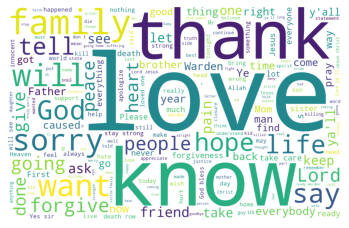

In [61]:
f = open('last statement.txt','r',encoding='utf-8').read()
wordcloud = WordCloud(
        background_color="white", 
        width=1500,              
        height=960,              
        margin=10               
        ).generate(f)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('last statement wordcloud.png')

- 结论：love, thank, family, sorry等词出现频率较高，与词频分析结论一致。

## 3.5 Last Statment情感分析

### 3.5.1 对所有遗言进行情感分析

In [15]:
with open('last statement.txt','r',encoding='utf-8') as f:
    last_statement = f.read()

In [16]:
from textblob import TextBlob
blob = TextBlob(last_statement)

In [17]:
blob.sentiment

Sentiment(polarity=0.17230236483827852, subjectivity=0.5695420069448924)

- 结论：总体而言，遗言情感略偏正向、主观。

### 3.5.2 对每条遗言进行情感分析

In [18]:
df = pd.read_excel('last_statement453.xlsx')
df.head()

last statement
0  Yes sir. I  would like to thank God, my dad, m...
1  Thank you thank you  where’s the family, ok I ...
2  Yeah, I want to  address the Roundtree family ...
3  Umm, Pamela can you  hear me Stephanie, Hardy,...
4  It’s 6:09 on  September 10th, Kayla and David,...

- sentiment列表包含了polarity和subjectivity两个维度。

In [19]:
sentiment = []

In [20]:
i = 0
while i < 452:
    blob = TextBlob(df.loc[i,'last statement'])
    sentiment.append(blob.sentiment)
    #print(i)
    if i == 452:
        break
    i += 1

In [21]:
import re
sent = re.findall(r'\d{0,1}\.\d+',str(sentiment))
sent

['0.25',
 '0.625',
 '0.04583333333333334',
 '0.6222222222222221',
 '0.35',
 '0.55',
 '0.06805555555555555',
 '0.5402777777777777',
 '0.16631016042780747',
 '0.5950757575757575',
 '0.25413818637502844',
 '0.5210213032581453',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.5',
 '0.6',
 '0.375',
 '0.5',
 '0.1',
 '0.175',
 '0.0',
 '0.0',
 '0.027083333333333334',
 '0.33541666666666664',
 '0.425',
 '0.5795454545454546',
 '0.54',
 '0.7155555555555556',
 '0.1875',
 '0.4875',
 '0.09492063492063492',
 '0.3426984126984127',
 '0.1319047619047619',
 '0.3387301587301587',
 '0.0',
 '0.0',
 '0.08506493506493507',
 '0.5867965367965368',
 '0.05833333333333334',
 '0.6888888888888888',
 '0.24083333333333332',
 '0.44350000000000006',
 '0.22604166666666664',
 '0.40520833333333334',
 '0.1375',
 '0.4',
 '0.22499999999999998',
 '0.76875',
 '0.05',
 '0.7066666666666667',
 '0.0',
 '0.0',
 '0.07142857142857142',
 '0.7839285714285714',
 '0.18547815820543095',
 '0.5296930342384887',
 '0.05606060606060608',
 '0.540151515151515

- 将sentiment分离为polarity和subjectivity两个维度。

In [22]:
polarity = []
subjectivity = []

In [23]:
i = 0
while i < 904:
    if i%2==0:
        polarity.append(float(sent[i]))
    else:
        subjectivity.append(float(sent[i]))
    i +=1

In [24]:
import pandas as pd
import plotly.express as px

x = pd.read_excel('polarity.xlsx')
y = pd.read_excel('subjectivity.xlsx')
z = pd.read_excel('cd.xlsx')
result = pd.concat([x, y, z], axis=1)
result.columns = ['1', 'polarity', '2', 'subjectivity', 'length']

fig1 = px.scatter(result, x='polarity', y='subjectivity')
fig1.show()

- 注：计算平均情感倾向(-1,1)

In [25]:
from numpy import *
ave_polarity = mean(polarity)
print(ave_polarity)

0.23799509090997503


- 注：计算平均主观程度(0,1)

In [26]:
ave_subjectivity = mean(subjectivity)
print(ave_subjectivity)

0.5434086430910671


In [27]:
fig3 = px.scatter(result, x='length', y='polarity',title='Correlation between length and polarity')
fig3.show()

- 结论：遗言长度与遗言情感倾向无明显关系。

In [28]:
fig4 = px.scatter(result, x='subjectivity', y='length',title='Correlation between length and subjectivity')
fig4.show()

- 结论：遗言长度与遗言主观程度无明显关系。

In [29]:
fig2 = px.scatter_3d(result, x="polarity", y="subjectivity", z="length")
fig2.show()

# “人之将死，其言也善！”